In [46]:
import pandas as pd
dtype={
      'culmen_length_mm':float,
      'culmen_depth_mm':float,
    'flipper_length_mm':float,
    'body_mass_g':float
       }   
data = pd.read_csv('penguins_size.csv', header=1, index_col=False,
                  names=['species','island','culmen_length_mm',
                         'culmen_depth_mm','flipper_length_mm','body_mass_g','sex'],dtype=dtype)
#为了方便展示，我们选取其中一部分数据
data_lite = data.iloc[: ,:]

#下面看一下数据的前5行是不是我们想要的结果
display(data_lite.head())

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
1,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
2,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [47]:
#删除至少有一个NaN的行 
data_lite.dropna(axis=0,how='any')
data_lite = data_lite[data_lite['culmen_length_mm'].notna()]
data_lite = data_lite[data_lite['sex'].notna()]
data_lite.isnull().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

In [48]:
features = data_lite.iloc[:,2:6]
X = features.values
y = data_lite.iloc[:,6].values

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
forest = RandomForestClassifier(n_estimators=25,random_state=3)
forest.fit(X_train, y_train)
print(forest.score(X_test, y_test))

0.9404761904761905


In [50]:
data_lite['sex1'] = 0
data_lite

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex1
0,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0
1,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE,0
...,...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,0
339,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,0
340,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,0
341,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,0


In [54]:

for i in range(data_lite.shape[0]):
    if data_lite.iloc[i,6]=='MALE':
        data_lite.iloc[i,7] = 1


In [56]:
data_lite

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex1
0,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0
1,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,1
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE,0
...,...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,0
339,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,0
340,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,1
341,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,0


In [57]:
features1 = data_lite.iloc[:,[2,3]]
X = features1.values
y = data_lite.iloc[:,7].values

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
forest1 = RandomForestClassifier(n_estimators=25,random_state=3)
forest1.fit(X_train, y_train)
print(forest1.score(X_test, y_test))

0.7619047619047619


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1912\1567515645.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


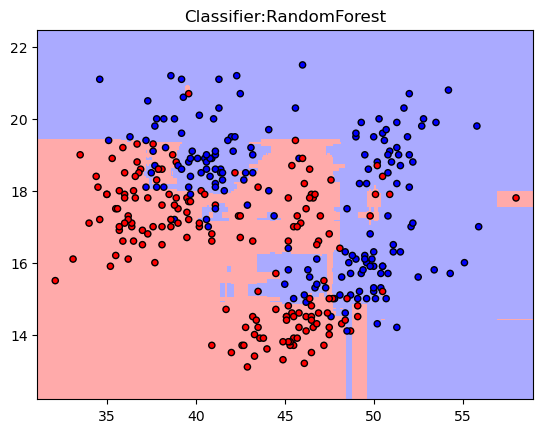

In [60]:
#定义图像中分区的颜色和散点的颜色
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#分别用样本的两个特征值创建图像和横轴和纵轴
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = forest1.predict(np.c_[xx.ravel(), yy.ravel()])

#给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#用散点把样本表示出来
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:RandomForest")


plt.show()